# Evaluate models results


- Part1 Best Architecture

- Part2 Different Model Architectures
1. The affect of Batch-Normalization
   - Model0     Without Batch-Normalization
   - Model0_1   Add Batch-Normalization 
   - Model1     Add Softmax layer
   
   
2. The affect of numbers of convolutional layers (2,3,4 layers)
   - Model1     2 convolutional layers 
   - Model2     3 convolutional layers
   - Model3     4 convolutional layers
   - Model4     5 convolutional layers
   
   
3. The affect of rate of dropout layer (2layers: 0.3,0.6,0.7,0.8 ; 3layers: 0.3,0.6,0.7,0.8)

   Three convolutional layers: 
   - Model2_0   rate = 0.3
   - Model2_1   rate = 0.6
   - Model2_2   rate = 0.7
   - Model2_3   rate = 0.8
   
   Four convolutional layers: 
   - Model3_0   rate = 0.3
   - Model3_1   rate = 0.6
   - Model3_2   rate = 0.7
   - Model3_3   rate = 0.8
   
4. The affect of optimizers (2layers: Adam,RMSProp,SGD ; 3layers: 2layers Adam,RMSProp,SGD)

    Three convolutional layers: 
   - Model2_0_1 Adam
   - Model2_0_2 SGD
   - Model2_0_3 RMSProp
   
    Four convolutional layers: 
   - Model3_0_1 Adam
   - Model3_0_2 SGD
   - Model3_0_3 RMSProp
   

# Table of contents

1. Imports Library 
2. Load different models 
3. Evaluate the performance of model
   - Confusion matrix, ROC
   - Accuracy and loss
   - Plot accuracy and loss curves
   
   

In [1]:
!pip install ipynb

In [7]:
#Import Library 

# Machine Learning and Data Science Imports 
import pandas as pd
import numpy as np
import scipy
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

# Built In Imports
from datetime import datetime

# Visualization Imports
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

#Evaluate Import
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# # Helper function
helper_functions = "./helper_functions.py"
from ipynb.fs.full.helper_functions import plot_loss, plot_accuracy, validation, cal_acc, evaluate

#from helper_functions import plot_loss, plot_accuracy, validation, cal_acc, evaluate

# Part1 Best Architecture

test_loss:  0.6844106550727572 test_acc:  tensor(0.5692)
result[AUC]:  0.5
result[report]               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       193
         1.0       0.56      1.00      0.71       241

    accuracy                           0.56       434
   macro avg       0.28      0.50      0.36       434
weighted avg       0.31      0.56      0.40       434

-------------Dataframe------------
         Pred 0  Pred 1
Label 0       0     193
Label 1       0     241


/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


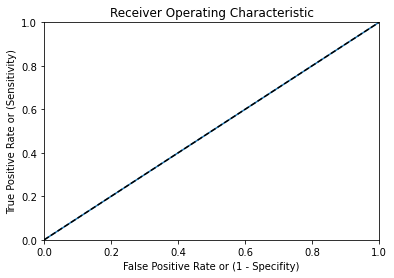

In [108]:
# Best Performance Model 

from ipynb.fs.full.MainCode2 import Net3,test1_loader,loss_function
load_model = torch.load("train_model3.pt")
test_loss,test_acc,outputs,labels=validation(load_model,test1_loader,loss_function)

print('test_loss: ',test_loss,'test_acc: ',test_acc)
#print('outputs:',outputs,'labels: ', labels)

result,fig =evaluate(torch.cat(labels),torch.cat(outputs))
print('result[AUC]: ', result['AUC'])
print('result[report]', result['report'])
print('-------------Dataframe------------')
df = pd.DataFrame(data = result['ConMatrix'],index=['Label 0','Label 1'],columns=['Pred 0','Pred 1'])
print(df)

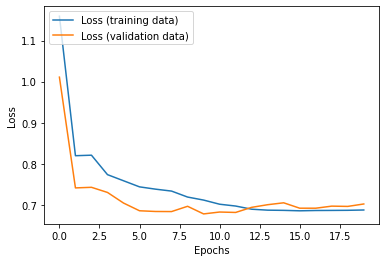

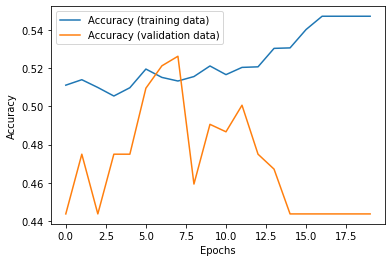

In [106]:
plot_loss(load_model)
plot_accuracy(load_model)

# Part2 Different model Architectures

test_loss:  0.7216707297733852   test_acc:  tensor(0.4796)
result[AUC]:  0.5043858706168168
result[report]               precision    recall  f1-score   support

         0.0       0.45      0.54      0.49       193
         1.0       0.56      0.46      0.51       241

    accuracy                           0.50       434
   macro avg       0.50      0.50      0.50       434
weighted avg       0.51      0.50      0.50       434

-------------Dataframe------------
         Pred 0  Pred 1
Label 0     105      88
Label 1     129     112


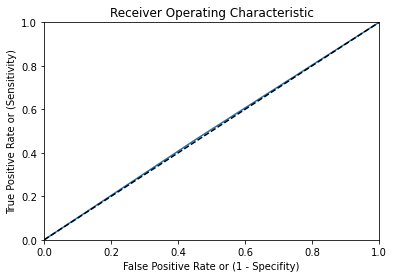

In [64]:
from ipynb.fs.full.MainCode2 import Net0,test1_loader,loss_function
load_model = torch.load("train_model0.pt")
test_loss,test_acc,outputs,labels=validation(load_model,test1_loader,loss_function)

print('test_loss: ',test_loss,'  test_acc: ',test_acc)
#print('outputs:',outputs,'labels: ', labels)

result,fig =evaluate(torch.cat(labels),torch.cat(outputs))
print('result[AUC]: ', result['AUC'])
print('result[report]', result['report'])
print('-------------Dataframe------------')
df = pd.DataFrame(data = result['ConMatrix'],index=['Label 0','Label 1'],columns=['Pred 0','Pred 1'])
print(df)

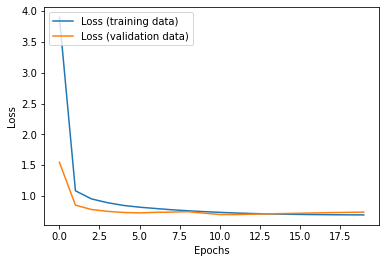

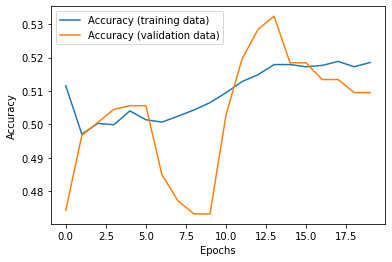

In [65]:
plot_loss(load_model)
plot_accuracy(load_model)

test_loss:  0.7166134949241366 test_acc:  tensor(0.4886)
result[AUC]:  0.4603336701567304
result[report]               precision    recall  f1-score   support

         0.0       0.41      0.48      0.44       193
         1.0       0.51      0.44      0.48       241

    accuracy                           0.46       434
   macro avg       0.46      0.46      0.46       434
weighted avg       0.47      0.46      0.46       434

-------------Dataframe------------
         Pred 0  Pred 1
Label 0      92     101
Label 1     134     107


/Users/chenyan/Desktop/Untitled Folder/MainCode2.ipynb:641: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  "id": "1e83083f",


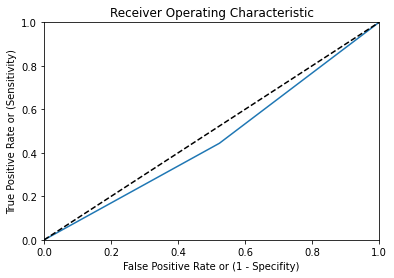

In [66]:
from ipynb.fs.full.MainCode2 import Net0_1,test1_loader,loss_function
load_model = torch.load("train_model0_1.pth")
test_loss,test_acc,outputs,labels= validation(load_model,test1_loader,loss_function)
print('test_loss: ',test_loss,'test_acc: ',test_acc)
result,fig=evaluate(torch.cat(labels),torch.cat(outputs))
print('result[AUC]: ', result['AUC'])
print('result[report]', result['report'])
print('-------------Dataframe------------')
df=pd.DataFrame(data = result['ConMatrix'],index=['Label 0','Label 1'],columns=['Pred 0','Pred 1'])
print(df)


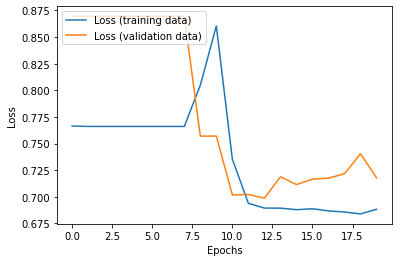

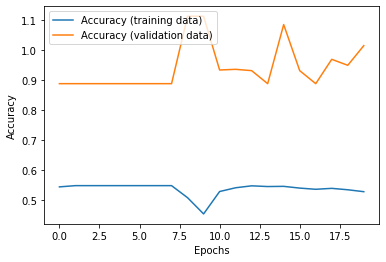

In [67]:
plot_loss(load_model)
plot_accuracy(load_model)

test_loss:  0.7608464956283569 test_acc:  tensor(0.4445)
result[AUC]:  0.48821834755874705
result[report]               precision    recall  f1-score   support

         0.0       0.44      0.72      0.54       193
         1.0       0.53      0.26      0.35       241

    accuracy                           0.46       434
   macro avg       0.49      0.49      0.45       434
weighted avg       0.49      0.46      0.44       434

-------------Dataframe------------
         Pred 0  Pred 1
Label 0     138      55
Label 1     178      63


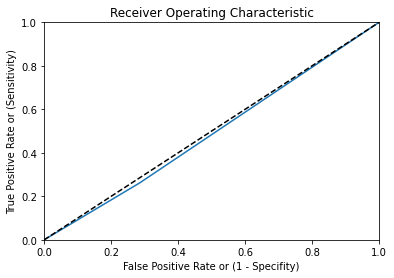

In [68]:
from ipynb.fs.full.MainCode2 import Net1,test1_loader,loss_function
load_model = torch.load("train_model1.pth")
test_loss,test_acc,outputs,labels= validation(load_model,test1_loader,loss_function)
print('test_loss: ',test_loss,'test_acc: ',test_acc)
result,fig=evaluate(torch.cat(labels),torch.cat(outputs))
print('result[AUC]: ', result['AUC'])
print('result[report]', result['report'])
print('-------------Dataframe------------')
df=pd.DataFrame(data = result['ConMatrix'],index=['Label 0','Label 1'],columns=['Pred 0','Pred 1'])
print(df)


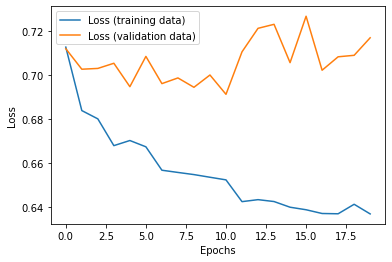

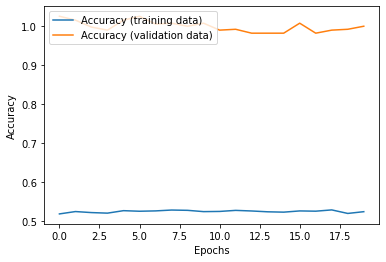

In [69]:
plot_loss(load_model)
plot_accuracy(load_model)

test_loss:  0.9707848748990467 test_acc:  tensor(0.4503)
result[AUC]:  0.4939156794874551
result[report]               precision    recall  f1-score   support

         0.0       0.44      0.73      0.55       193
         1.0       0.54      0.26      0.35       241

    accuracy                           0.47       434
   macro avg       0.49      0.49      0.45       434
weighted avg       0.50      0.47      0.44       434

-------------Dataframe------------
         Pred 0  Pred 1
Label 0     141      52
Label 1     179      62


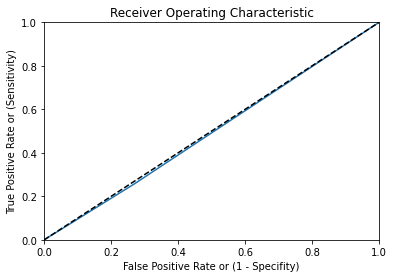

In [70]:
from ipynb.fs.full.MainCode2 import Net2,test1_loader,loss_function
load_model = torch.load("train_model2.pth")
test_loss,test_acc,outputs,labels= validation(load_model,test1_loader,loss_function)
print('test_loss: ',test_loss,'test_acc: ',test_acc)
result,fig=evaluate(torch.cat(labels),torch.cat(outputs))
print('result[AUC]: ', result['AUC'])
print('result[report]', result['report'])
print('-------------Dataframe------------')
df=pd.DataFrame(data = result['ConMatrix'],index=['Label 0','Label 1'],columns=['Pred 0','Pred 1'])
print(df)

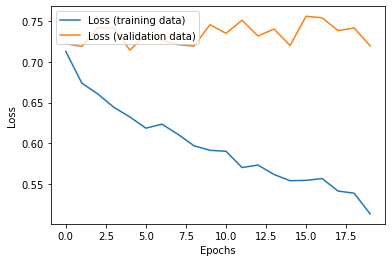

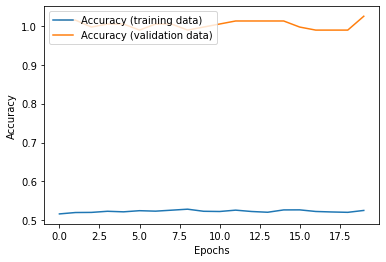

In [71]:
plot_loss(load_model)
plot_accuracy(load_model)

test_loss:  0.8408580422401428 test_acc:  tensor(0.4417)
result[AUC]:  0.47216907101240513
result[report]               precision    recall  f1-score   support

         0.0       0.42      0.66      0.52       193
         1.0       0.51      0.29      0.37       241

    accuracy                           0.45       434
   macro avg       0.47      0.47      0.44       434
weighted avg       0.47      0.45      0.43       434

-------------Dataframe------------
         Pred 0  Pred 1
Label 0     127      66
Label 1     172      69


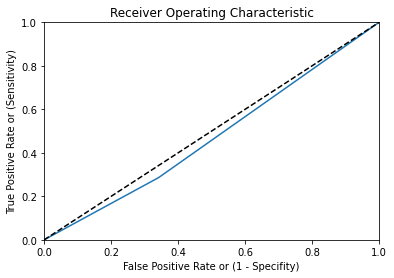

In [73]:
from ipynb.fs.full.MainCode2 import Net4,test1_loader,loss_function
load_model = torch.load("train_model4.pth")
test_loss,test_acc,outputs,labels= validation(load_model,test1_loader,loss_function)
print('test_loss: ',test_loss,'test_acc: ',test_acc)
result,fig=evaluate(torch.cat(labels),torch.cat(outputs))
print('result[AUC]: ', result['AUC'])
print('result[report]', result['report'])
print('-------------Dataframe------------')
df=pd.DataFrame(data = result['ConMatrix'],index=['Label 0','Label 1'],columns=['Pred 0','Pred 1'])
print(df)

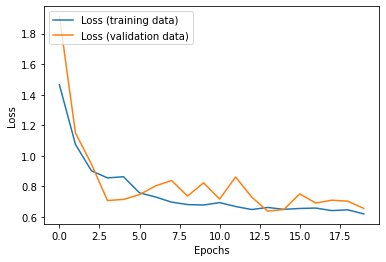

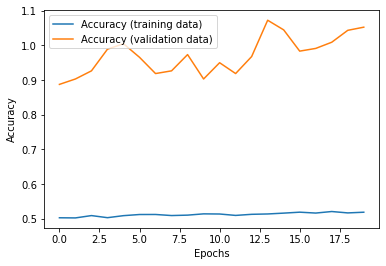

In [74]:
plot_loss(load_model)
plot_accuracy(load_model)

test_loss:  0.8925896606275013 test_acc:  tensor(0.4448)
result[AUC]:  0.4934211940747748
result[report]               precision    recall  f1-score   support

         0.0       0.44      0.68      0.54       193
         1.0       0.54      0.30      0.39       241

    accuracy                           0.47       434
   macro avg       0.49      0.49      0.46       434
weighted avg       0.50      0.47      0.45       434

-------------Dataframe------------
         Pred 0  Pred 1
Label 0     132      61
Label 1     168      73


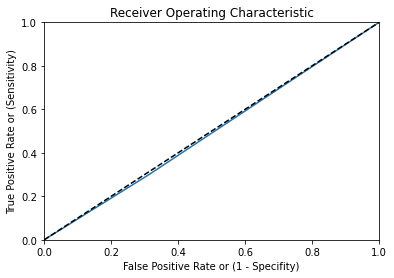

In [75]:
from ipynb.fs.full.MainCode2 import Net2_1,test1_loader,loss_function
load_model = torch.load("train_model2_1.pth")
test_loss,test_acc,outputs,labels= validation(load_model,test1_loader,loss_function)
print('test_loss: ',test_loss,'test_acc: ',test_acc)
result,fig=evaluate(torch.cat(labels),torch.cat(outputs))
print('result[AUC]: ', result['AUC'])
print('result[report]', result['report'])
print('-------------Dataframe------------')
df=pd.DataFrame(data = result['ConMatrix'],index=['Label 0','Label 1'],columns=['Pred 0','Pred 1'])
print(df)

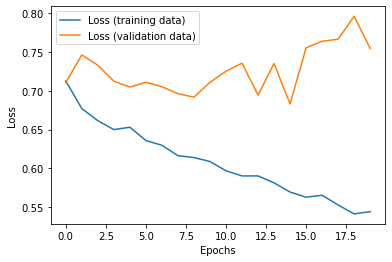

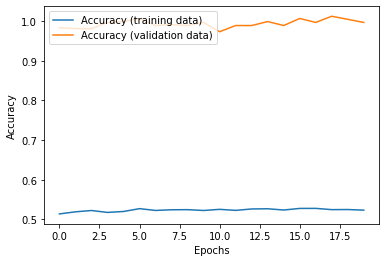

In [76]:
plot_loss(load_model)
plot_accuracy(load_model)

test_loss:  0.8925896606275013 test_acc:  tensor(0.4448)
result[AUC]:  0.4934211940747748
result[report]               precision    recall  f1-score   support

         0.0       0.44      0.68      0.54       193
         1.0       0.54      0.30      0.39       241

    accuracy                           0.47       434
   macro avg       0.49      0.49      0.46       434
weighted avg       0.50      0.47      0.45       434

-------------Dataframe------------
         Pred 0  Pred 1
Label 0     132      61
Label 1     168      73


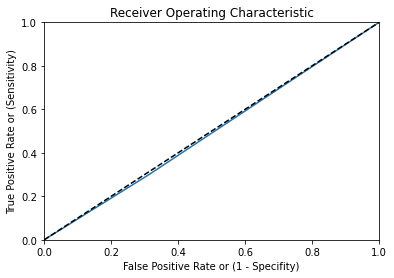

In [86]:
from ipynb.fs.full.MainCode2 import Net2_2,test1_loader,loss_function
load_model = torch.load("train_model2_2.pth")
test_loss,test_acc,outputs,labels= validation(load_model,test1_loader,loss_function)
print('test_loss: ',test_loss,'test_acc: ',test_acc)
result,fig=evaluate(torch.cat(labels),torch.cat(outputs))
print('result[AUC]: ', result['AUC'])
print('result[report]', result['report'])
print('-------------Dataframe------------')
df=pd.DataFrame(data = result['ConMatrix'],index=['Label 0','Label 1'],columns=['Pred 0','Pred 1'])
print(df)

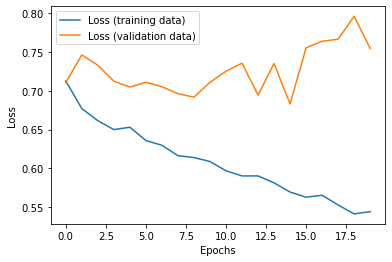

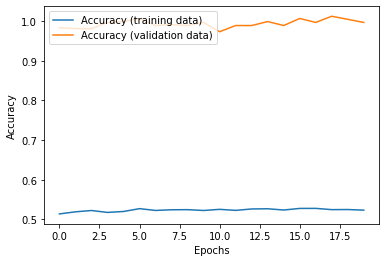

In [84]:
plot_loss(load_model)
plot_accuracy(load_model)

test_loss:  0.8925896606275013 test_acc:  tensor(0.4448)
result[AUC]:  0.4934211940747748
result[report]               precision    recall  f1-score   support

         0.0       0.44      0.68      0.54       193
         1.0       0.54      0.30      0.39       241

    accuracy                           0.47       434
   macro avg       0.49      0.49      0.46       434
weighted avg       0.50      0.47      0.45       434

-------------Dataframe------------
         Pred 0  Pred 1
Label 0     132      61
Label 1     168      73


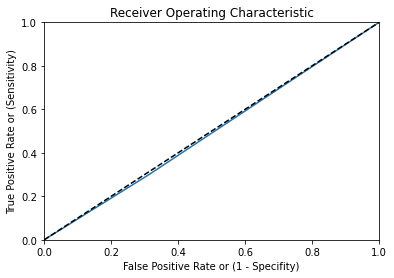

In [87]:
from ipynb.fs.full.MainCode2 import Net2_3,test1_loader,loss_function
load_model = torch.load("train_model2_3.pth")
test_loss,test_acc,outputs,labels= validation(load_model,test1_loader,loss_function)
print('test_loss: ',test_loss,'test_acc: ',test_acc)
result,fig=evaluate(torch.cat(labels),torch.cat(outputs))
print('result[AUC]: ', result['AUC'])
print('result[report]', result['report'])
print('-------------Dataframe------------')
df=pd.DataFrame(data = result['ConMatrix'],index=['Label 0','Label 1'],columns=['Pred 0','Pred 1'])
print(df)

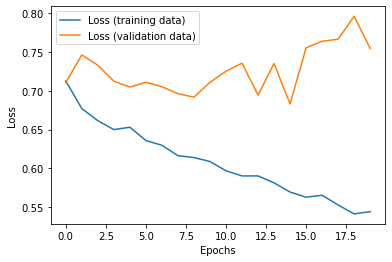

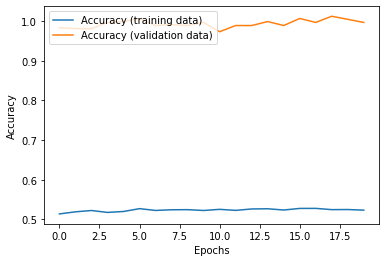

In [88]:
plot_loss(load_model)
plot_accuracy(load_model)

test_loss:  0.8817586238895144 test_acc:  tensor(0.4509)
result[AUC]:  0.5074387805559736
result[report]               precision    recall  f1-score   support

         0.0       0.45      0.66      0.53       193
         1.0       0.57      0.36      0.44       241

    accuracy                           0.49       434
   macro avg       0.51      0.51      0.49       434
weighted avg       0.51      0.49      0.48       434

-------------Dataframe------------
         Pred 0  Pred 1
Label 0     127      66
Label 1     155      86


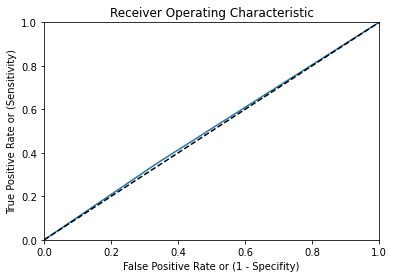

In [54]:
from ipynb.fs.full.MainCode2 import Net2,test1_loader,loss_function
load_model = torch.load("train_model2_0_1.pth")
test_loss,test_acc,outputs,labels= validation(load_model,test1_loader,loss_function)
print('test_loss: ',test_loss,'test_acc: ',test_acc)
result,fig=evaluate(torch.cat(labels),torch.cat(outputs))
print('result[AUC]: ', result['AUC'])
print('result[report]', result['report'])
print('-------------Dataframe------------')
df=pd.DataFrame(data = result['ConMatrix'],index=['Label 0','Label 1'],columns=['Pred 0','Pred 1'])
print(df)

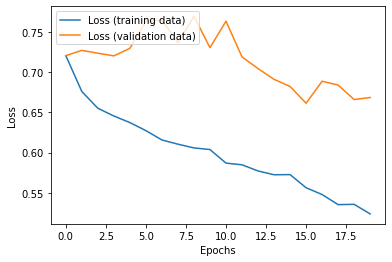

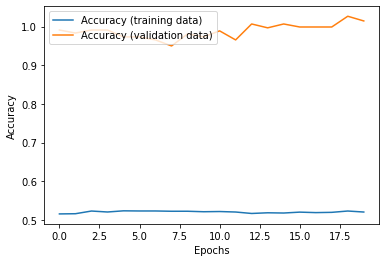

In [55]:
plot_loss(load_model)
plot_accuracy(load_model)

test_loss:  0.9103022004876818 test_acc:  tensor(0.4506)
result[AUC]:  0.4882505966074001
result[report]               precision    recall  f1-score   support

         0.0       0.44      0.65      0.52       193
         1.0       0.54      0.32      0.40       241

    accuracy                           0.47       434
   macro avg       0.49      0.49      0.46       434
weighted avg       0.49      0.47      0.46       434

-------------Dataframe------------
         Pred 0  Pred 1
Label 0     126      67
Label 1     163      78


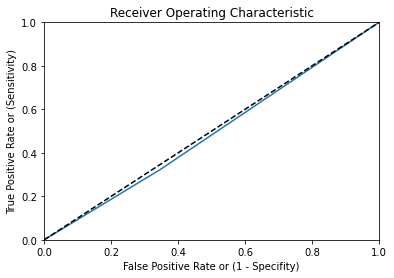

In [56]:
from ipynb.fs.full.MainCode2 import Net2,test1_loader,loss_function
load_model = torch.load("train_model2_0_2.pth")
test_loss,test_acc,outputs,labels= validation(load_model,test1_loader,loss_function)
print('test_loss: ',test_loss,'test_acc: ',test_acc)
result,fig=evaluate(torch.cat(labels),torch.cat(outputs))
print('result[AUC]: ', result['AUC'])
print('result[report]', result['report'])
print('-------------Dataframe------------')
df=pd.DataFrame(data = result['ConMatrix'],index=['Label 0','Label 1'],columns=['Pred 0','Pred 1'])
print(df)

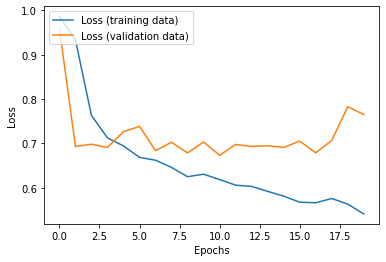

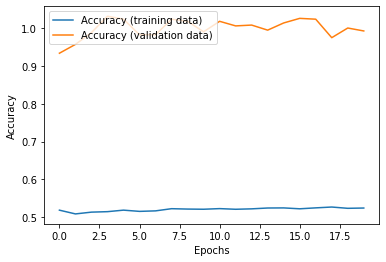

In [57]:
plot_loss(load_model)
plot_accuracy(load_model)

test_loss:  0.7009438276290894 test_acc:  tensor(0.4308)
result[AUC]:  0.5
result[report]               precision    recall  f1-score   support

         0.0       0.44      1.00      0.62       193
         1.0       0.00      0.00      0.00       241

    accuracy                           0.44       434
   macro avg       0.22      0.50      0.31       434
weighted avg       0.20      0.44      0.27       434

-------------Dataframe------------
         Pred 0  Pred 1
Label 0     193       0
Label 1     241       0


/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


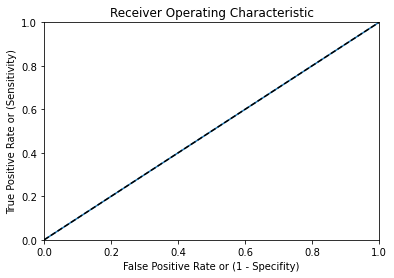

In [58]:
from ipynb.fs.full.MainCode2 import Net2,test1_loader,loss_function
load_model = torch.load("train_model2_0_3.pth")
test_loss,test_acc,outputs,labels= validation(load_model,test1_loader,loss_function)
print('test_loss: ',test_loss,'test_acc: ',test_acc)
result,fig=evaluate(torch.cat(labels),torch.cat(outputs))
print('result[AUC]: ', result['AUC'])
print('result[report]', result['report'])
print('-------------Dataframe------------')
df=pd.DataFrame(data = result['ConMatrix'],index=['Label 0','Label 1'],columns=['Pred 0','Pred 1'])
print(df)

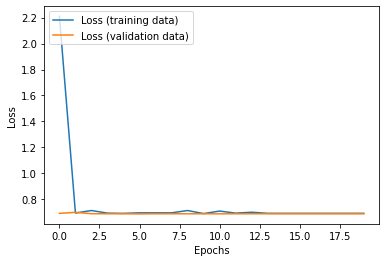

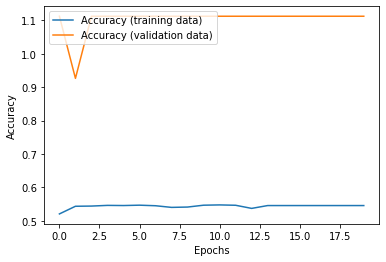

In [59]:
plot_loss(load_model)
plot_accuracy(load_model)

test_loss:  0.6844106550727572 test_acc:  tensor(0.5692)
result[AUC]:  0.5
result[report]               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       193
         1.0       0.56      1.00      0.71       241

    accuracy                           0.56       434
   macro avg       0.28      0.50      0.36       434
weighted avg       0.31      0.56      0.40       434

-------------Dataframe------------
         Pred 0  Pred 1
Label 0       0     193
Label 1       0     241


/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


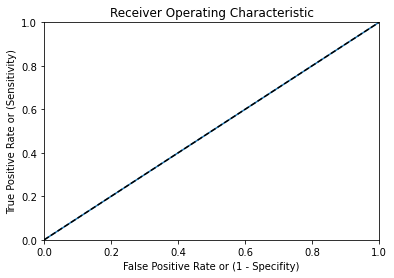

In [30]:
# Best Performance Model 

from ipynb.fs.full.MainCode2 import Net3,test1_loader,loss_function
load_model = torch.load("train_model3.pt")
test_loss,test_acc,outputs,labels=validation(load_model,test1_loader,loss_function)

print('test_loss: ',test_loss,'test_acc: ',test_acc)
#print('outputs:',outputs,'labels: ', labels)

result,fig =evaluate(torch.cat(labels),torch.cat(outputs))
print('result[AUC]: ', result['AUC'])
print('result[report]', result['report'])
print('-------------Dataframe------------')
df = pd.DataFrame(data = result['ConMatrix'],index=['Label 0','Label 1'],columns=['Pred 0','Pred 1'])
print(df)

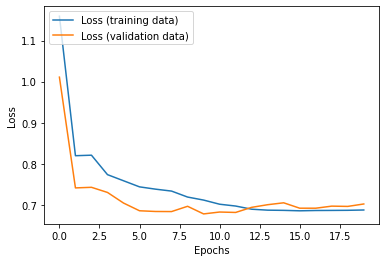

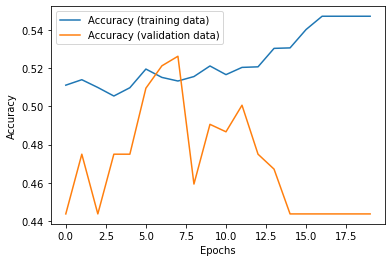

In [31]:
plot_loss(load_model)
plot_accuracy(load_model)

test_loss:  0.7553259496177945 test_acc:  tensor(0.4353)
result[AUC]:  0.5151463031840561
result[report]               precision    recall  f1-score   support

         0.0       0.45      0.80      0.58       193
         1.0       0.59      0.23      0.33       241

    accuracy                           0.48       434
   macro avg       0.52      0.52      0.46       434
weighted avg       0.53      0.48      0.44       434

-------------Dataframe------------
         Pred 0  Pred 1
Label 0     154      39
Label 1     185      56


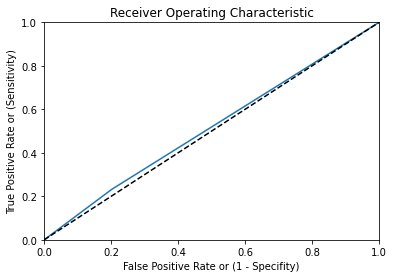

In [91]:
# Best Performance Model 

from ipynb.fs.full.MainCode2 import Net3,test1_loader,loss_function
load_model = torch.load("train_model3_0_2.pth")
test_loss,test_acc,outputs,labels=validation(load_model,test1_loader,loss_function)

print('test_loss: ',test_loss,'test_acc: ',test_acc)
result,fig =evaluate(torch.cat(labels),torch.cat(outputs))
print('result[AUC]: ', result['AUC'])
print('result[report]', result['report'])
print('-------------Dataframe------------')
df = pd.DataFrame(data = result['ConMatrix'],index=['Label 0','Label 1'],columns=['Pred 0','Pred 1'])
print(df)

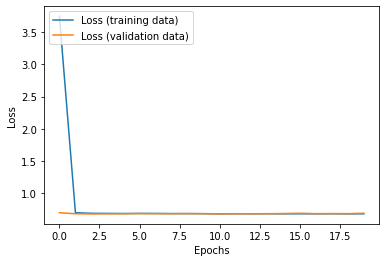

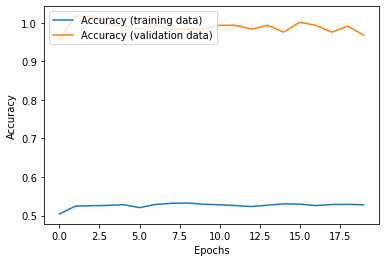

In [92]:
plot_loss(load_model)
plot_accuracy(load_model)

test_loss:  0.6935481003352574 test_acc:  tensor(0.4980)
result[AUC]:  0.5208113860641111
result[report]               precision    recall  f1-score   support

         0.0       0.46      0.88      0.60       193
         1.0       0.62      0.17      0.26       241

    accuracy                           0.48       434
   macro avg       0.54      0.52      0.43       434
weighted avg       0.55      0.48      0.41       434

-------------Dataframe------------
         Pred 0  Pred 1
Label 0     169      24
Label 1     201      40


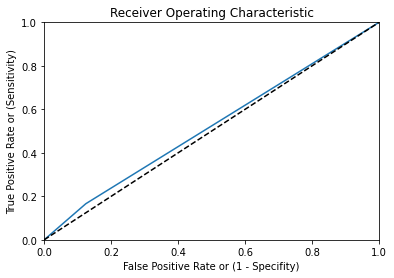

In [93]:
# Best Performance Model 

from ipynb.fs.full.MainCode2 import Net3,test1_loader,loss_function
load_model = torch.load("train_model3_0_3.pth")
test_loss,test_acc,outputs,labels=validation(load_model,test1_loader,loss_function)

print('test_loss: ',test_loss,'test_acc: ',test_acc)
#print('outputs:',outputs,'labels: ', labels)

result,fig =evaluate(torch.cat(labels),torch.cat(outputs))
print('result[AUC]: ', result['AUC'])
print('result[report]', result['report'])
print('-------------Dataframe------------')
df = pd.DataFrame(data = result['ConMatrix'],index=['Label 0','Label 1'],columns=['Pred 0','Pred 1'])
print(df)

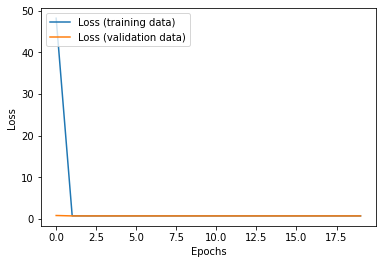

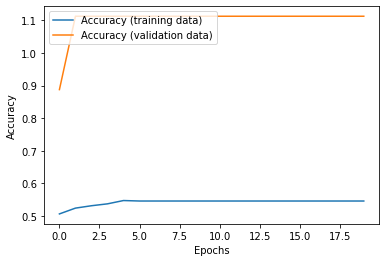

In [94]:
plot_loss(load_model)
plot_accuracy(load_model)

test_loss:  0.6973371548312051 test_acc:  tensor(0.4835)
result[AUC]:  0.512480381828736
result[report]               precision    recall  f1-score   support

         0.0       0.45      0.94      0.61       193
         1.0       0.64      0.09      0.15       241

    accuracy                           0.47       434
   macro avg       0.54      0.51      0.38       434
weighted avg       0.55      0.47      0.36       434

-------------Dataframe------------
         Pred 0  Pred 1
Label 0     181      12
Label 1     220      21


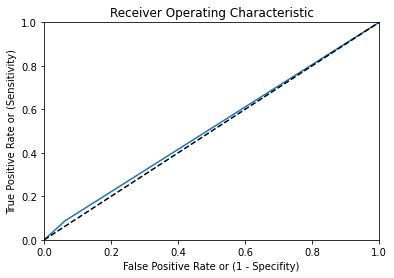

In [99]:
from ipynb.fs.full.MainCode2 import Net3_1,test1_loader,loss_function
load_model = torch.load("train_model3_1.pth")
test_loss,test_acc,outputs,labels=validation(load_model,test1_loader,loss_function)

print('test_loss: ',test_loss,'test_acc: ',test_acc)
#print('outputs:',outputs,'labels: ', labels)

result,fig =evaluate(torch.cat(labels),torch.cat(outputs))
print('result[AUC]: ', result['AUC'])
print('result[report]', result['report'])
print('-------------Dataframe------------')
df = pd.DataFrame(data = result['ConMatrix'],index=['Label 0','Label 1'],columns=['Pred 0','Pred 1'])
print(df)

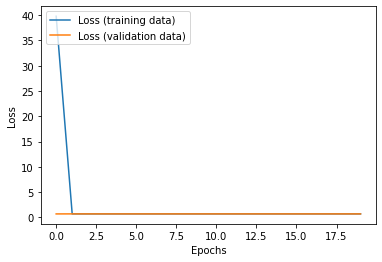

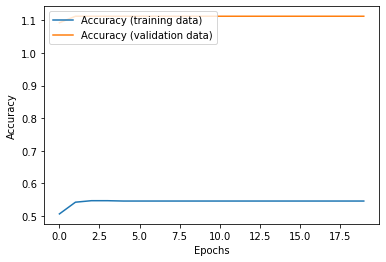

In [100]:
plot_loss(load_model)
plot_accuracy(load_model)

test_loss:  0.7009437999555043 test_acc:  tensor(0.4308)
result[AUC]:  0.5
result[report]               precision    recall  f1-score   support

         0.0       0.44      1.00      0.62       193
         1.0       0.00      0.00      0.00       241

    accuracy                           0.44       434
   macro avg       0.22      0.50      0.31       434
weighted avg       0.20      0.44      0.27       434

-------------Dataframe------------
         Pred 0  Pred 1
Label 0     193       0
Label 1     241       0


/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


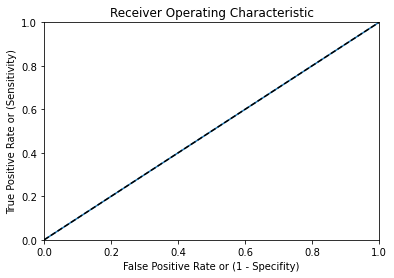

In [110]:
from ipynb.fs.full.MainCode2 import Net3_2,test1_loader,loss_function
load_model = torch.load("train_model3_2.pth")
test_loss,test_acc,outputs,labels=validation(load_model,test1_loader,loss_function)

print('test_loss: ',test_loss,'test_acc: ',test_acc)
#print('outputs:',outputs,'labels: ', labels)

result,fig =evaluate(torch.cat(labels),torch.cat(outputs))
print('result[AUC]: ', result['AUC'])
print('result[report]', result['report'])
print('-------------Dataframe------------')
df = pd.DataFrame(data = result['ConMatrix'],index=['Label 0','Label 1'],columns=['Pred 0','Pred 1'])
print(df)

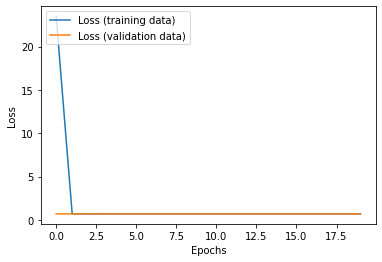

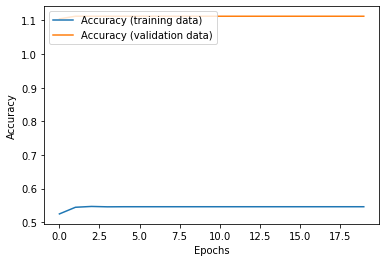

In [102]:
plot_loss(load_model)
plot_accuracy(load_model)

test_loss:  0.7009437999555043 test_acc:  tensor(0.4308)
result[AUC]:  0.5
result[report]               precision    recall  f1-score   support

         0.0       0.44      1.00      0.62       193
         1.0       0.00      0.00      0.00       241

    accuracy                           0.44       434
   macro avg       0.22      0.50      0.31       434
weighted avg       0.20      0.44      0.27       434

-------------Dataframe------------
         Pred 0  Pred 1
Label 0     193       0
Label 1     241       0


/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


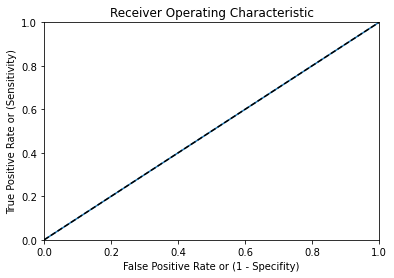

In [103]:
from ipynb.fs.full.MainCode2 import Net3_3,test1_loader,loss_function
load_model = torch.load("train_model3_3.pth")
test_loss,test_acc,outputs,labels=validation(load_model,test1_loader,loss_function)

print('test_loss: ',test_loss,'test_acc: ',test_acc)
#print('outputs:',outputs,'labels: ', labels)

result,fig =evaluate(torch.cat(labels),torch.cat(outputs))
print('result[AUC]: ', result['AUC'])
print('result[report]', result['report'])
print('-------------Dataframe------------')
df = pd.DataFrame(data = result['ConMatrix'],index=['Label 0','Label 1'],columns=['Pred 0','Pred 1'])
print(df)

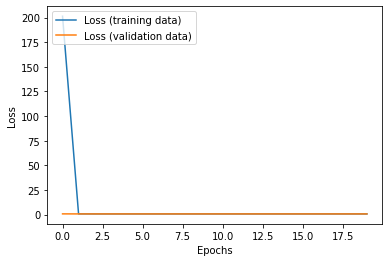

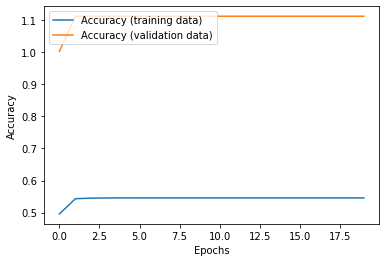

In [104]:
plot_loss(load_model)
plot_accuracy(load_model)